<a href="https://colab.research.google.com/github/Prateeklk/Logistic-Regression/blob/main/LR_without_lib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
dataset = [{"Age" : 25, 'Salary': 40},
           {"Age" : 27, 'Salary': 46},
           {"Age" : 29, 'Salary': 48},
           {"Age" : 30, 'Salary': 51},
           {"Age" : 32, 'Salary': 52},
           {"Age" : 35, 'Salary': 58},
           {"Age" : 36, 'Salary': 59},
           {"Age" : 39, 'Salary': 64}]

In [43]:
dataset

[{'Age': 25, 'Salary': 40},
 {'Age': 27, 'Salary': 46},
 {'Age': 29, 'Salary': 48},
 {'Age': 30, 'Salary': 51},
 {'Age': 32, 'Salary': 52},
 {'Age': 35, 'Salary': 58},
 {'Age': 36, 'Salary': 59},
 {'Age': 39, 'Salary': 64}]

In [44]:
df = pd.DataFrame(dataset)

In [45]:
X = df.Age
y = df.Salary

In [46]:
X_mean = X.mean()
y_mean = y.mean()

In [47]:
X_mean, y_mean

(31.625, 52.25)

In [48]:
df['X_diff'] = X_mean - X

In [49]:
df['y_diff'] =  y_mean - y

In [50]:
df['X_diff_sqr'] = df.X_diff ** 2

In [51]:
(df.X_diff * df.y_diff).sum()

258.75

In [69]:
sum(df.X_diff * df.y_diff)

258.75

In [52]:
m = (df.X_diff * df.y_diff).sum() / df.X_diff_sqr.sum()

In [53]:
m

1.6184519155590305

In [54]:
df

,Age,Salary,X_diff,y_diff,X_diff_sqr
0,25,40,6.625,12.25,43.890625
1,27,46,4.625,6.25,21.390625
2,29,48,2.625,4.25,6.890625
3,30,51,1.625,1.25,2.640625
4,32,52,-0.375,0.25,0.140625
5,35,58,-3.375,-5.75,11.390625
6,36,59,-4.375,-6.75,19.140625
7,39,64,-7.375,-11.75,54.390625


In [55]:
 # y = mx + b
 # b = y - mx

 b = y_mean - m * X_mean

In [56]:
b

1.0664581704456637

In [57]:
salary_pred = []
for x in df['Age']:
  salary_pred.append(m*x + b)

In [58]:
salary_pred

[41.52775605942143,
 44.764659890539484,
 48.00156372165755,
 49.620015637216575,
 52.85691946833464,
 57.71227521501173,
 59.33072713057076,
 64.18608287724786]

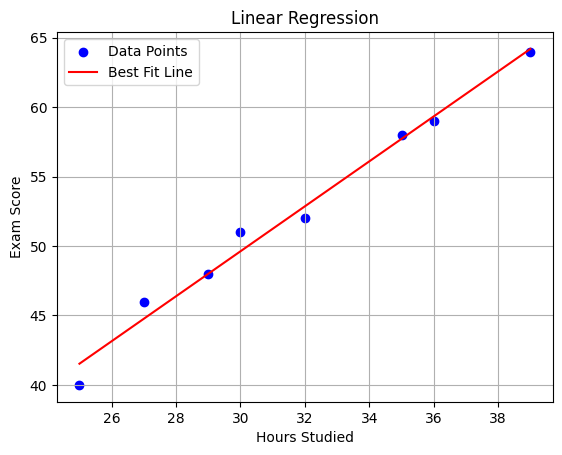

In [76]:
x_fit = np.linspace(min(X), max(X), 100)  # Create a range of x-values
y_fit = m * x_fit + b  # Calculate corresponding y-values

# Plot the data and the best fit line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(x_fit, y_fit, color='red', label='Best Fit Line')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

In [64]:
y_pred_diff = []
zip_val = zip(df['Salary'], salary_pred)
for i,j in zip_val:
  y_pred_diff.append((i - j)**2)

In [65]:
y_pred_diff

[2.3340385770988896,
 1.5260651860419199,
 2.4452254222816457e-06,
 1.9043568415267753,
 0.7343109752109189,
 0.0827855518965466,
 0.10938043489556676,
 0.03462683720484048]

In [71]:
mse = sum(y_pred_diff)/ len(X)

In [68]:
mse

0.84069585613761

In [77]:
def gradient_decent(X,y,learning_rate,epochs, slope,intercept):
  m = slope
  b = intercept
  n = len(X)

  for _ in range(epochs):
    y_pred = m * X + b
    error = y_pred - y

    m_gradient = (2/n) * np.sum(error * X)
    b_gradient = (2/n) * np.sum(error)

    m = m - learning_rate * m_gradient
    b = b - learning_rate * b_gradient

  return m, b

In [89]:
new_m, new_b = gradient_decent(X,y,0.001,10000,m,b )
print("updated slope : ",new_m)
print("Updated intercept : ",new_b)

updated slope :  1.6184519155590307
Updated intercept :  1.0664581704456637


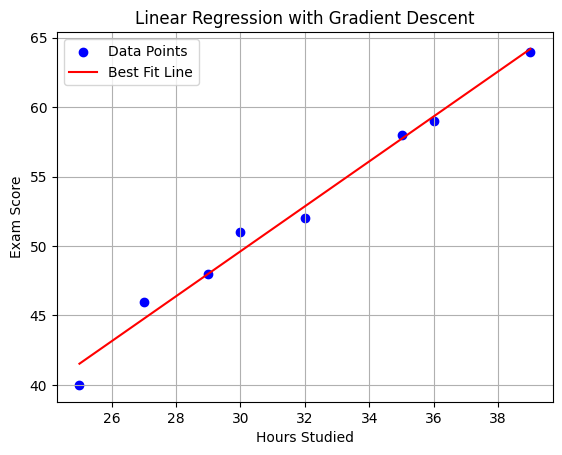

In [82]:
x_fit = np.linspace(min(X), max(X), 100)  # Create a range of x-values
y_fit = new_m * x_fit + new_b  # Calculate corresponding y-values

# Plot the data and the best fit line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(x_fit, y_fit, color='red', label='Best Fit Line')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

In [83]:
salary_pred_g = []
for x in df['Age']:
  salary_pred_g.append(new_m*x + new_b)

In [84]:
y_pred_diff_g = []
zip_val = zip(df['Salary'], salary_pred)
for i,j in zip_val:
  y_pred_diff_g.append((i - j)**2)

In [86]:
mse_g = sum(y_pred_diff_g)/ len(X)

In [87]:
mse_g

0.84069585613761